<a href="https://colab.research.google.com/github/sujal029/oibsip_taskno/blob/main/Welcome_to_Colaboratory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

If you're already familiar with Colab, check out this video to learn about interactive tables, the executed code history view and the command palette.

<center>
  <a href="https://www.youtube.com/watch?v=rNgswRZ2C1Y" target="_blank">
  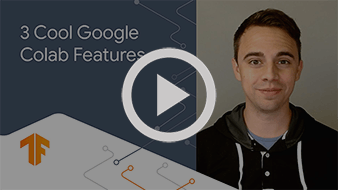
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or ‘Colaboratory’, allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a <strong>student</strong>, a <strong>data scientist</strong> or an <strong>AI researcher</strong>, Colab can make your work easier. Watch <a href="https://www.youtube.com/watch?v=inN8seMm7UI">Introduction to Colab</a> to find out more, or just get started below!

In [6]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [11]:
data= pd.read_csv("/content/kc_house_data (1).csv")

In [12]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [13]:
data.describe(include=[np.number])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [14]:
data.isnull().sum() #Data not having any NaNs

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

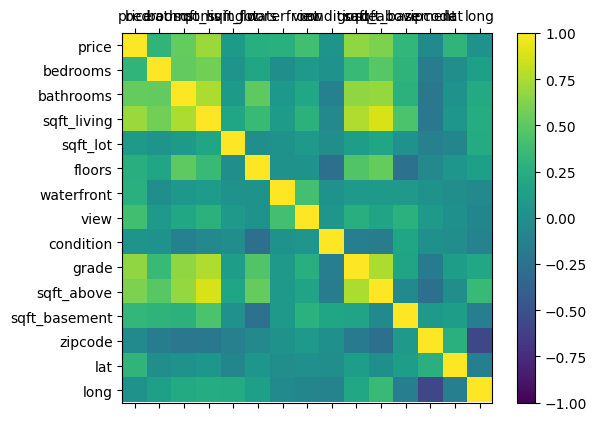

In [15]:
names=['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','zipcode','lat','long']
df=data[names]
correlations= df.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)
ticks=np.arange(0,15,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

In [21]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

<Axes: xlabel='sqft_living', ylabel='price'>

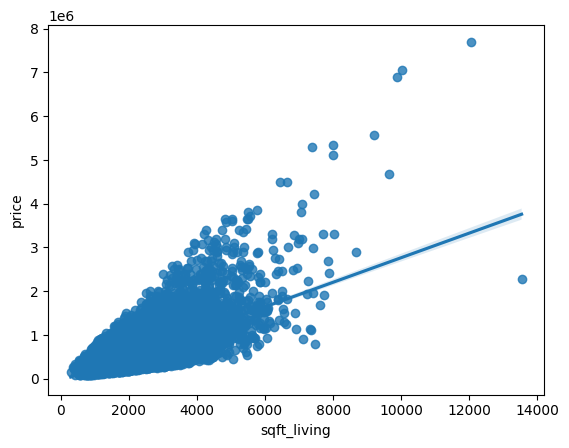

In [22]:
#sns.set_style()
sns.regplot(x='sqft_living',y='price',data=data)

<Axes: xlabel='sqft_basement', ylabel='price'>

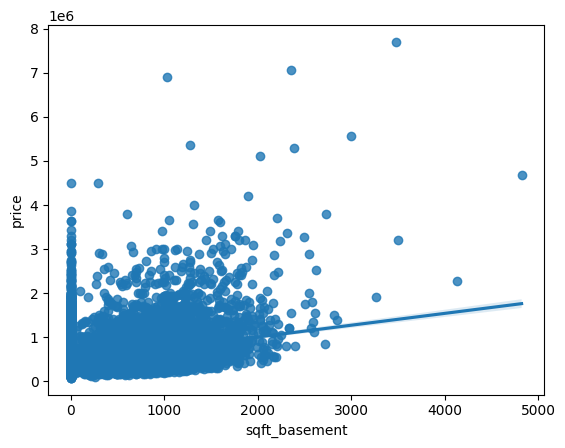

In [23]:
sns.regplot(x='sqft_basement',y='price',data=data)

<Axes: xlabel='sqft_above', ylabel='price'>

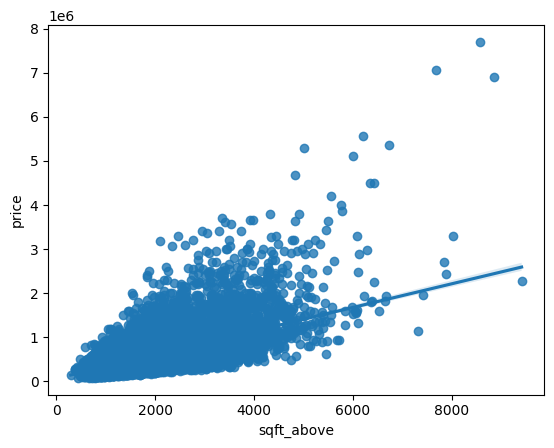

In [24]:
sns.regplot(x='sqft_above',y='price',data=data)

<Axes: xlabel='bedrooms', ylabel='price'>

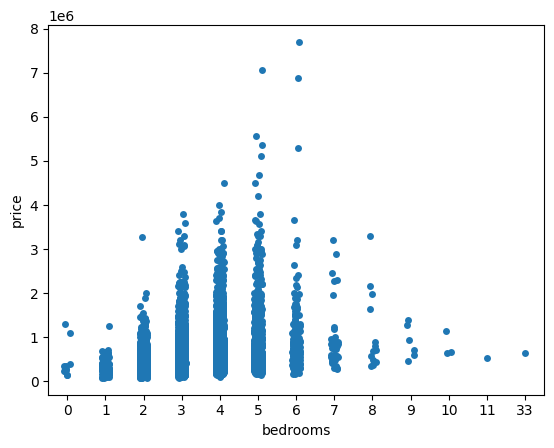

In [25]:
sns.stripplot(x='bedrooms', y='price',data=data)

<Axes: xlabel='bathrooms', ylabel='price'>

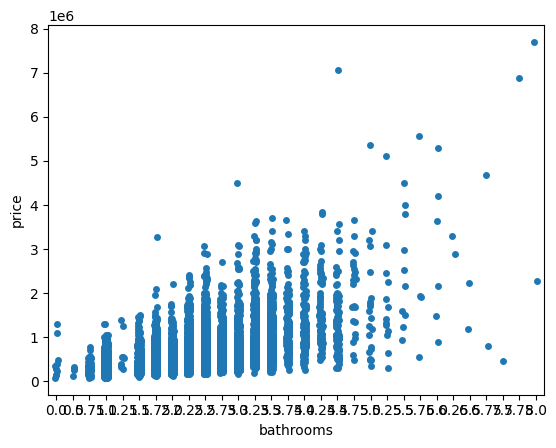

In [26]:
sns.stripplot(x='bathrooms', y='price',data=data, size=5)

<Axes: xlabel='grade', ylabel='price'>

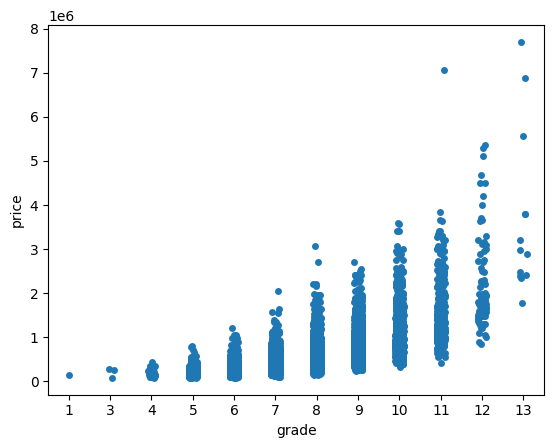

In [27]:
sns.stripplot(x='grade', y='price',data=data, size=5)

In [28]:
data=data[data['bedrooms'] < 10]

In [29]:
data=data[data['bathrooms']<8]

In [30]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
c=['bedrooms','bathrooms','sqft_living','sqft_above','grade']
df=data[c]

In [33]:
df=pd.get_dummies(df,columns=['grade'], drop_first=True)

In [34]:
y=data['price']

In [35]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [36]:
x_train.head()

,bedrooms,bathrooms,sqft_living,sqft_above,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
19151,3,2.50,1830,1830,0,0,0,0,0,1,0,0,0,0,0
6248,4,2.50,2310,2310,0,0,0,0,0,1,0,0,0,0,0
13665,4,1.50,1800,1800,0,0,0,0,1,0,0,0,0,0,0
7241,4,2.50,2740,2740,0,0,0,0,0,1,0,0,0,0,0
17293,3,1.75,1280,1030,0,0,0,0,0,1,0,0,0,0,0


In [37]:
reg=LinearRegression()

In [38]:
reg.fit(x_train,y_train)

LinearRegression()

In [41]:
print('Coefficients: \n', reg.coef_)
 #Coefficients: # [ -2.29668616e+04 -2.58269301e+03 2.31278874e+02 -9.49870688e+01 # -5.30622026e+05 -4.81879701e+05 -4.82543663e+05 -4.51474787e+05 # -4.19169329e+05 -3.40826437e+05 -1.99835359e+05 7.81207530e+03 # 2.84775801e+05 8.46419807e+05 1.76734362e+06]

Coefficients: 
 [-2.40240334e+04  1.19525580e+03  2.33406537e+02 -9.40736510e+01
  4.46631343e+04  5.62824778e+04  6.15853504e+04  8.28619607e+04
  1.14317231e+05  1.87432147e+05  3.32622483e+05  5.28697442e+05
  8.30932804e+05  1.33212139e+06  2.03744364e+06]


In [42]:
print(metrics.mean_squared_error(y_test, reg.predict(x_test))) #58127859345.8

58175041681.16265


In [43]:
reg.score(x_test,y_test) #0.6035

0.5946909070826021

In [44]:
df=pd.get_dummies(data,columns=['waterfront','view','condition','grade','zipcode'], drop_first=True)

In [46]:
y=data['price']
df= df.drop(['date','id','price'],axis=1)

In [47]:
x_train,x_test,y_train,y_test=train_test_split(df,y,train_size=0.8,random_state=42)

In [48]:
reg.fit(x_train,y_train)

LinearRegression()

In [49]:
print('Coefficients: \n', reg.coef_)
print(metrics.mean_squared_error(y_test, reg.predict(x_test)))
print(reg.score(x_test,y_test))

Coefficients: 
 [-1.18120382e+04  2.70890439e+04  9.08931187e+01  2.93107773e-01
 -3.05720292e+04  7.30476060e+01  1.78473990e+01 -3.12752574e+02
  2.23363357e+01  2.09223645e+05 -1.81908595e+05  1.57915162e+01
 -1.60332137e-01  5.48683204e+05  9.31521757e+04  7.71497010e+04
  1.42081603e+05  3.16623309e+05  8.50690023e+04  8.86762023e+04
  1.14804298e+05  1.55353626e+05  2.93557913e+04 -4.76604460e+04
 -8.95450797e+04 -9.17394932e+04 -8.71926281e+04 -6.55796658e+04
  1.01780338e+04  1.27054728e+05  3.30233782e+05  7.23460708e+05
  1.37856011e+06  1.97357618e+04 -1.13257144e+04  7.22555060e+05
  2.68558089e+05  2.23032496e+05  2.17716324e+05  2.30648283e+05
  1.04477448e+05  5.46470126e+04  8.92988627e+04  6.89878577e+04
  6.34648547e+04 -4.22252334e+04  1.73364940e+05  1.66541527e+05
  4.67498914e+04  2.20984725e+05  1.40599040e+04  1.47161011e+04
 -1.10361691e+04  2.98820984e+05  1.29067531e+05  7.01102738e+04
  1.11527081e+06  4.65748712e+05  2.40804028e+04  1.58205605e+05
  1.95269